In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [2]:
CA = pd.read_excel('CA.xlsx')
GB = pd.read_excel('GB.xlsx')
US = pd.read_excel('US.xlsx')

In [3]:
data = pd.concat([CA, GB, US])
data.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [4]:
data.shape

(113366, 15)

# 每种视频分类的播放量、点赞量排名

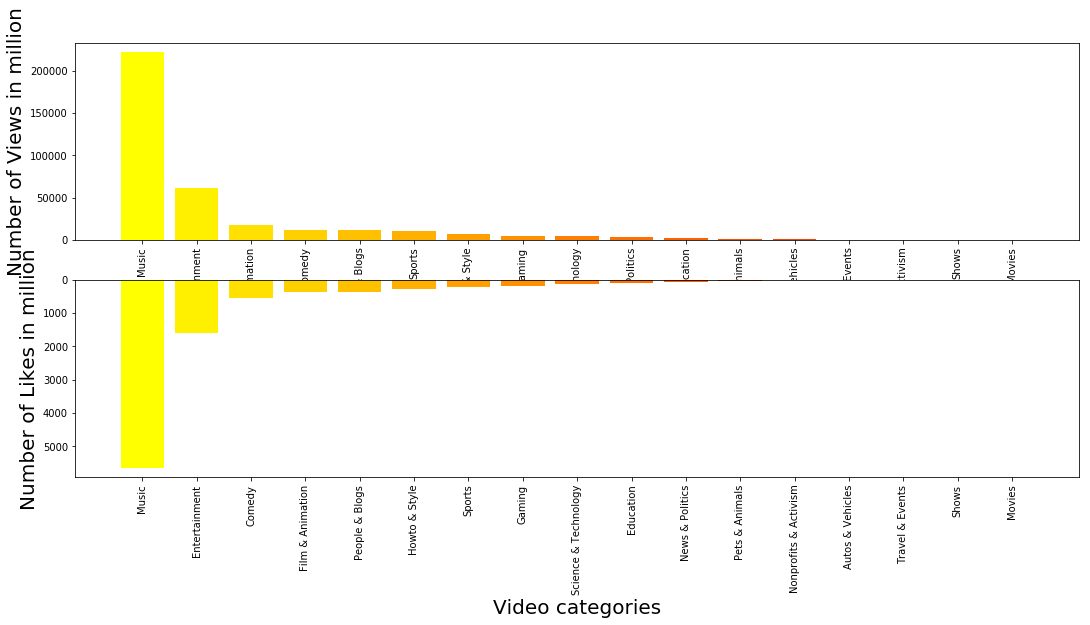

In [5]:
views_perc = data.groupby(by=['category'],as_index=False).views.sum()
likes_perc = data.groupby(by=['category'],as_index=False).likes.sum()
views_perc_m = [int(views/1000000) for views in views_perc.sort_values(by='views').views.values]
likes_perc_m = [int(likes/1000000) for likes in likes_perc.sort_values(by='likes').likes.values]
cat_val1_1=views_perc.sort_values(by='views').category.values
cat_val1_2=likes_perc.sort_values(by='likes').category.values

fig,[ax1_1,ax1_2]=plt.subplots(figsize=(18,8),nrows=2,ncols=1)

cmap1 = plt.get_cmap('autumn')
colors1_1=[cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))]

ax1_1.bar(cat_val1_1,views_perc_m,color=colors1_1)
ax1_1.set_xticks(range(len(cat_val1_1)))
ax1_1.set_xticklabels(cat_val1_1,rotation=90)
ax1_1.set_xlabel('Video categories',fontsize=20)
ax1_1.set_ylabel('Number of Views in million',fontsize=20)
ax1_1.invert_xaxis()

colors1_2 = [cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))]
ax1_2.bar(cat_val1_2,likes_perc_m,color=colors1_2)
ax1_2.set_xticks(range(len(cat_val1_2)))
ax1_2.set_xticklabels(cat_val1_2,rotation=90)
ax1_2.set_xlabel('Video categories',fontsize=20)
ax1_2.set_ylabel('Number of Likes in million',fontsize=20)
ax1_2.invert_xaxis()
ax1_2.invert_yaxis()

### 图中描述了各视频分类的播放量和点赞量，可以看出音乐类视频不论是播放量还是点赞量的数据都明显高于其他类视频。

# 视频发布至上榜用时排名

In [7]:
data['day_use'] = (data['trending_date'] - data['publish_date']).dt.days
df_count =data['day_use'].value_counts().rename_axis('long').reset_index(name='counts') 

In [8]:
days = df_count['long']
count =  df_count['counts']

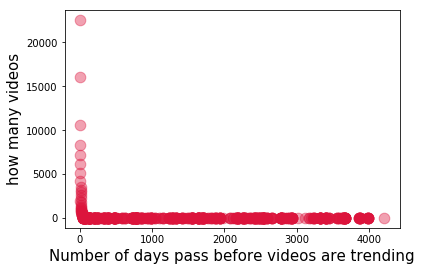

In [9]:
plt.xlabel('Number of days pass before videos are trending',fontsize=15)
plt.ylabel('how many videos',fontsize=15)

colors2 = '#DC143C'
area = np.pi * 6**2

plt.scatter(days, count, s=area, c=colors2, alpha=0.4)

### 图中描述了上榜视频从发布至上榜历经的时间，可以看出绝大部分上榜视频从发布之初就受到欢迎，但也有一些视频在一段时间的等待之后才受到欢迎。

# 上榜视频当日发布时间分布

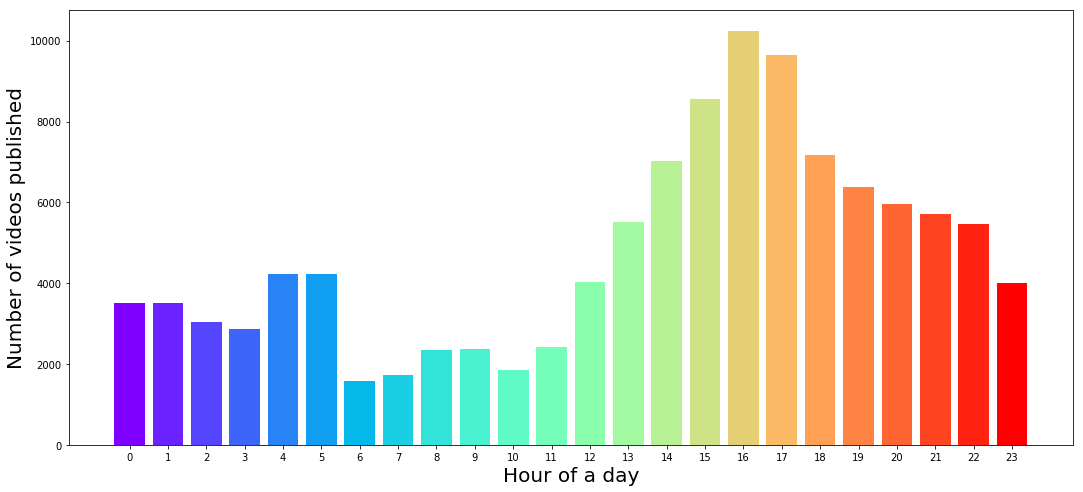

In [10]:
data['hours'] = data['publish_time'].dt.hour
hours,times=zip(*sorted(data['hours'].value_counts().to_dict().items(),key=lambda val:val[0]))

fig,ax3=plt.subplots(figsize=(18,8))

cmap3 = plt.get_cmap('rainbow')
colors3=[cmap3(i) for i in np.linspace(0, 1, len(hours))]

ax3.bar(hours,times,color=colors3)
ax3.set_xticks(range(len(hours)))
ax3.set_xticklabels(hours)
ax3.set_xlabel('Hour of a day',fontsize=20)
ax3.set_ylabel('Number of videos published',fontsize=20);

### 图中描述了上榜视频在发布当天选择的时间段。可以看出发布视频最多的时间段在下午4点至5点，大部分上榜视频发布在傍晚。